In [1]:
from keras.datasets import cifar10

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [3]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [4]:
y_train[0]

array([6], dtype=uint8)

In [5]:
x_train.min(), x_train.max()

(0, 255)

In [6]:
import matplotlib.pyplot as plt
import numpy as np

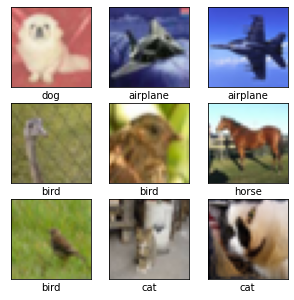

In [7]:
np.random.seed(777)
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
sample_size = 9
random_idx = np.random.randint(50000, size = sample_size)

plt.figure(figsize=(5,5))
for i, idx in enumerate(random_idx):
  plt.subplot(3,3, i+1 )
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[idx], cmap = 'gray')
  plt.xlabel(class_names[int(y_train[idx])])

plt.show()



In [8]:
x_mean = np.mean(x_train, axis = (0,1,2) )
x_std = np.std(x_train,axis=(0,1,2))

x_train = (x_train - x_mean)/ x_std
x_test = (x_test - x_mean)/x_std


In [ ]:
x_train.min(), x_train.max()

(-1.98921279913639, 2.1267894095169213)

In [ ]:
np.mean(x_train)

5.2147915615326686e-17

In [ ]:
np.round(np.mean(x_train),1)

0.0

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state =777)

In [ ]:
x_train.shape, x_val.shape

((35000, 32, 32, 3), (15000, 32, 32, 3))

In [ ]:
# from keras.utils import to_categorical
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from keras.optimizers import Adam

In [ ]:
model = Sequential([
    Conv2D(filters = 32, kernel_size=3, padding='same', activation = 'relu', input_shape=(32,32,3)),
    Conv2D(filters = 32, kernel_size=3, padding='same', activation = 'relu'),
    MaxPool2D(pool_size = (2,2),strides = 2, padding = 'same'),

    Conv2D(filters = 64, kernel_size=3, padding='same', activation = 'relu'),
    Conv2D(filters = 64, kernel_size=3, padding='same', activation = 'relu'),
    MaxPool2D(pool_size = (2,2),strides = 2, padding = 'same'),

    Conv2D(filters = 128, kernel_size=3, padding='same', activation = 'relu'),
    Conv2D(filters = 128, kernel_size=3, padding='same', activation = 'relu'),
    MaxPool2D(pool_size = (2,2),strides = 2, padding = 'same'),

    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')



])


model.compile(optimizer = Adam(1e-4), loss = 'sparse_categorical_crossentropy', metrics = ['acc'])



# 레이블 정수 값을 쓸 때, sparse_categorical_crossentropy
# 원핫 인코딩 값을 쓸 때, categorical_crossentropy

In [ ]:

history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data = (x_val, y_val))


Epoch 1/30
1094/1094 [==============================] - 15s 7ms/step - loss: 1.6307 - acc: 0.4113 - val_loss: 1.3972 - val_acc: 0.4925
Epoch 2/30
1094/1094 [==============================] - 7s 7ms/step - loss: 1.2791 - acc: 0.5457 - val_loss: 1.2462 - val_acc: 0.5507
Epoch 3/30
1094/1094 [==============================] - 7s 6ms/step - loss: 1.1151 - acc: 0.6055 - val_loss: 1.0787 - val_acc: 0.6141
Epoch 4/30
1094/1094 [==============================] - 7s 6ms/step - loss: 0.9860 - acc: 0.6564 - val_loss: 0.9958 - val_acc: 0.6456
Epoch 5/30
1094/1094 [==============================] - 7s 7ms/step - loss: 0.8821 - acc: 0.6918 - val_loss: 0.9650 - val_acc: 0.6589
Epoch 6/30
1094/1094 [==============================] - 7s 6ms/step - loss: 0.7983 - acc: 0.7217 - val_loss: 0.8680 - val_acc: 0.6929
Epoch 7/30
1094/1094 [==============================] - 8s 7ms/step - loss: 0.7164 - acc: 0.7518 - val_loss: 0.8401 - val_acc: 0.7028
Epoch 8/30
1094/1094 [==============================] - 7s 6m

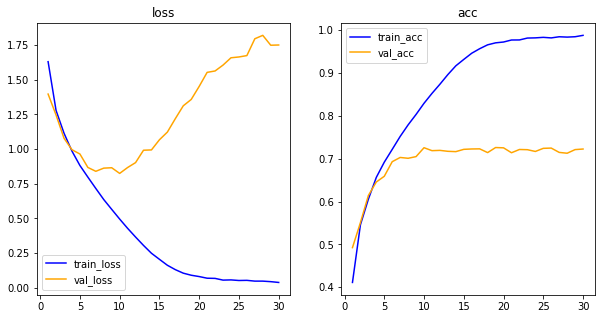

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1,len(loss)+1)
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs,loss,color='blue',label='train_loss')
ax1.plot(epochs,val_loss,color='orange',label='val_loss')
ax1.set_title('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs,acc,color='blue',label='train_acc')
ax2.plot(epochs,val_acc,color='orange',label='val_acc')
ax2.set_title('acc')
ax2.legend()

plt.show()

In [ ]:
import tensorflow as tf

In [ ]:
get_layer_name = [ layer.name for layer in model.layers]

In [ ]:
get_layer_name

['conv2d',
 'conv2d_1',
 'max_pooling2d',
 'conv2d_2',
 'conv2d_3',
 'max_pooling2d_1',
 'conv2d_4',
 'conv2d_5',
 'max_pooling2d_2',
 'flatten',
 'dense',
 'dense_1']

In [ ]:
get_output = [ layer.output for layer in model.layers]
get_output # 객체들 

[<KerasTensor: shape=(None, 32, 32, 32) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 32, 32, 32) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 16, 16, 32) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 16, 16, 64) dtype=float32 (created by layer 'conv2d_2')>,
 <KerasTensor: shape=(None, 16, 16, 64) dtype=float32 (created by layer 'conv2d_3')>,
 <KerasTensor: shape=(None, 8, 8, 64) dtype=float32 (created by layer 'max_pooling2d_1')>,
 <KerasTensor: shape=(None, 8, 8, 128) dtype=float32 (created by layer 'conv2d_4')>,
 <KerasTensor: shape=(None, 8, 8, 128) dtype=float32 (created by layer 'conv2d_5')>,
 <KerasTensor: shape=(None, 4, 4, 128) dtype=float32 (created by layer 'max_pooling2d_2')>,
 <KerasTensor: shape=(None, 2048) dtype=float32 (created by layer 'flatten')>,
 <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'dense')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by l

In [ ]:
x_test[1].shape

(32, 32, 3)

In [ ]:
visual_model = tf.keras.models.Model(inputs = model.input, outputs = get_output)

test_img = np.expand_dims(x_test[1],axis=0)

In [ ]:
test_img.shape

(1, 32, 32, 3)

In [ ]:
feature_maps = visual_model.predict(test_img)

1/1 [==============================] - 0s 230ms/step


In [ ]:
feature_maps

[array([[[[0.3003617 , 0.        , 0.01659065, ..., 0.        ,
           0.8312232 , 0.        ],
          [0.06694096, 0.        , 0.        , ..., 0.        ,
           0.29303136, 0.15137026],
          [0.0720874 , 0.        , 0.        , ..., 0.        ,
           0.31043372, 0.13967891],
          ...,
          [0.07382816, 0.        , 0.        , ..., 0.        ,
           0.31749842, 0.1367988 ],
          [0.07060938, 0.        , 0.        , ..., 0.        ,
           0.31610653, 0.14001931],
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.6761239 , 0.07075975]],
 
         [[0.03136062, 0.        , 0.        , ..., 0.        ,
           0.87663925, 0.        ],
          [0.06569039, 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.0611973 , 0.        , 0.        , ..., 0.        ,
           0.00327874, 0.        ],
          ...,
          [0.06335726, 0.        , 0.        , ..., 0.        ,
   

<ipython-input-29-773d54fd890b>:14: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


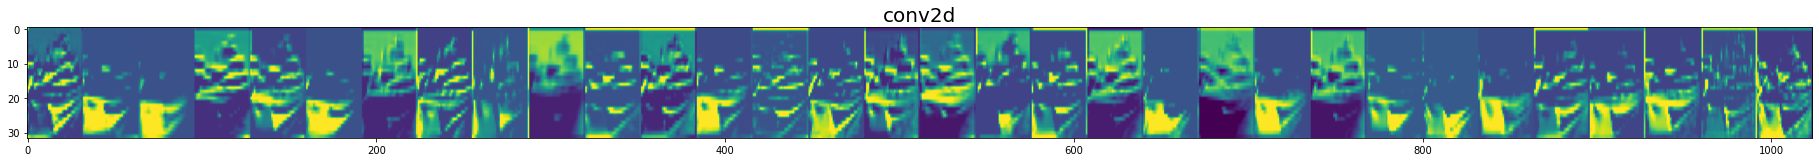

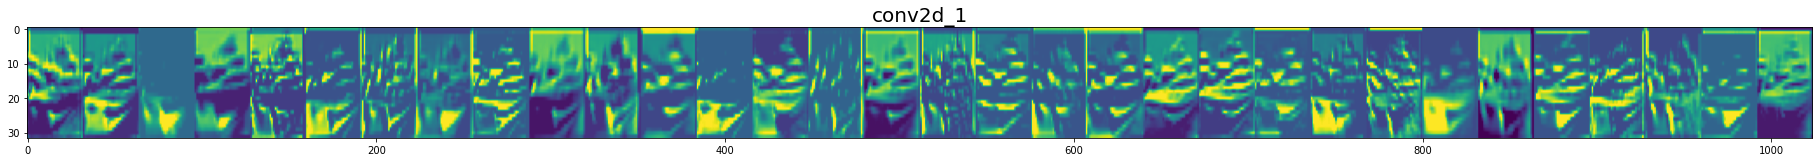

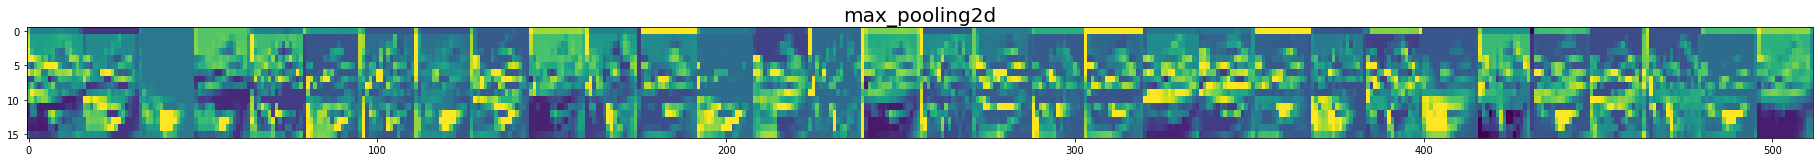

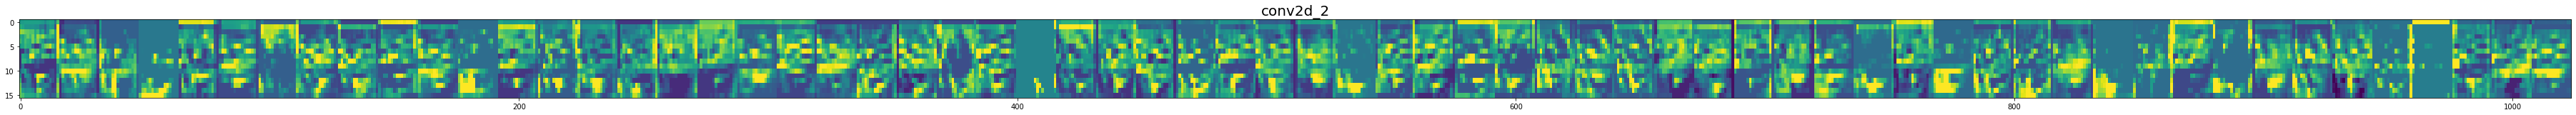

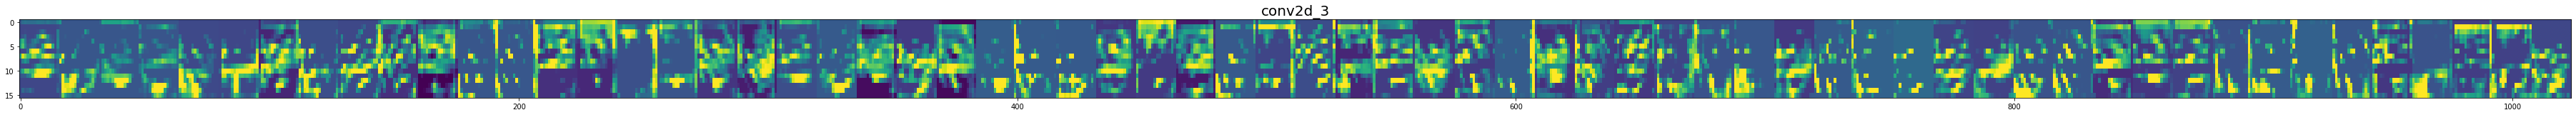

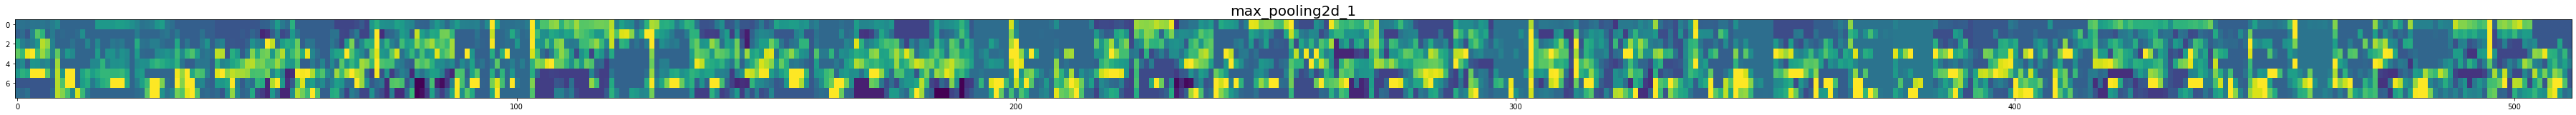

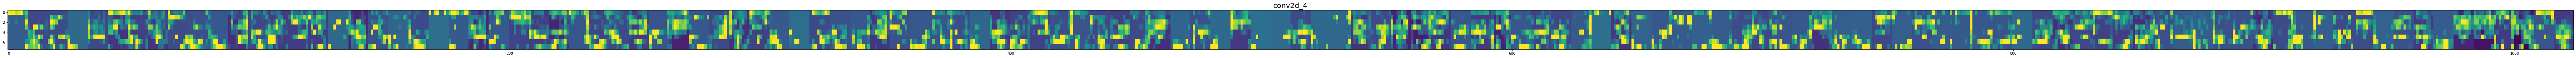

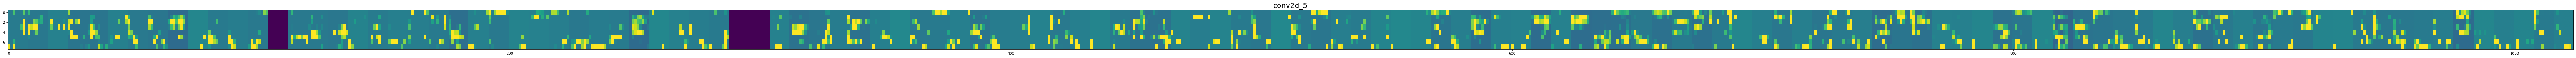

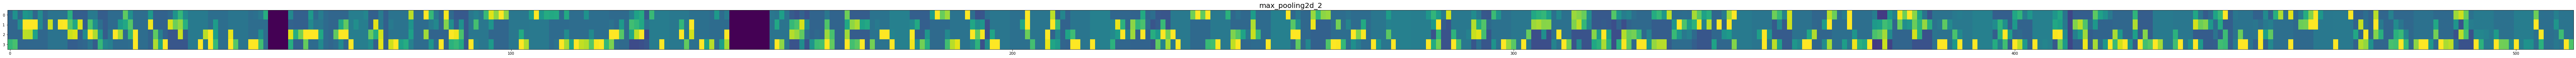

In [ ]:
for layer_name, feature_map in zip(get_layer_name, feature_maps):
  # print(layer_name, feature_map)
  if(len(feature_map.shape) == 4):
    # 4차원이냐
    img_size = feature_map.shape[1]
    features = feature_map.shape[-1]
    # RGB 채널수 나중에는 필터 수로

    display_grid = np.zeros((img_size, img_size* features))

    for i in range(features):
      x = feature_map[0,:,:,i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x,0,255).astype('uint8')
      display_grid[:,i*img_size: (i+1)*img_size] = x

    plt.figure(figsize=(features, 2+1./features ))
    plt.title(layer_name, fontsize = 20)
    plt.grid(False)
    plt.imshow(display_grid, aspect = 'auto')

# 특성맵

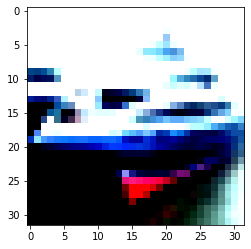

In [ ]:
plt.imshow(x_test[1])
# 원본 배 이미지 # 엄현히 말하자면 원본은 아님